In [4]:
import pytplot
import numpy as np
pytplot.cdf_to_tplot('ak_h1_elf_19900211_v03.cdf')
E = pytplot.get_data('dE_wav_narrow')

import pyspedas
pyspedas.time_string(E.times[0]), pyspedas.time_string(E.times[0] + 24*3600),  E.times[0] + 24*3600 

('1990-02-11 00:57:29.250000', '1990-02-12 00:57:29.250000', 634784249.25)

In [2]:
import pytplot
import numpy as np
pytplot.cdf_to_tplot('ak_h1_elf_19900211_v03.cdf')
E = pytplot.get_data('dE_wav_narrow')

maxE, minE = max(E.y), min(E.y)
time_delta = 1 #s
time_array = np.arange(E.times[0], E.times[0]+int(24*3600/time_delta), time_delta)

saturation_rate = np.empty(time_array.size)

for i in range(time_array.size-1):
    time_index = np.where((E.times >= time_array[i]) & (E.times < time_array[i+1]))
    E_for_time_delta = E.y[time_index]
    
    maxE_index = np.where(E_for_time_delta==maxE)
    minE_index = np.where(E_for_time_delta==minE)
    
    print(time_array[i], maxE_index, minE_index)
    
    saturation_rate[i] = (maxE_index[0].size + minE_index[0].size)/time_index[0].size

pytplot.store_data('saturation_rate', data={'times':time_array, 'y':saturation_rate})
        
pytplot.options('dE_wav_narrow', 'yrange', [-1500, 1500])
pytplot.tplot(['dE_wav_narrow', 'saturation_rate'])

/home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


634262400.75 (array([], dtype=int64),) (array([], dtype=int64),)


ZeroDivisionError: division by zero

In [19]:
postgap = pytplot.get_data('PostGap')
postgap.y[0:100]

array([4294967294,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,        256,          0,          0,
                0,          0,          0,          0,          0,
             4864,        768,        768,        768,        768,
                0,        768,      17152,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
                0,          0,          0,          0,          0,
             4096,          0,          0,          0,          0,
                0,          0,          0,          0,        

In [3]:
pytplot.cdf_to_tplot('ak_h1_elf_19900211_v01.cdf')

/home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


ValueError: No variable by this name: Band

ValueError: year -1 is out of range

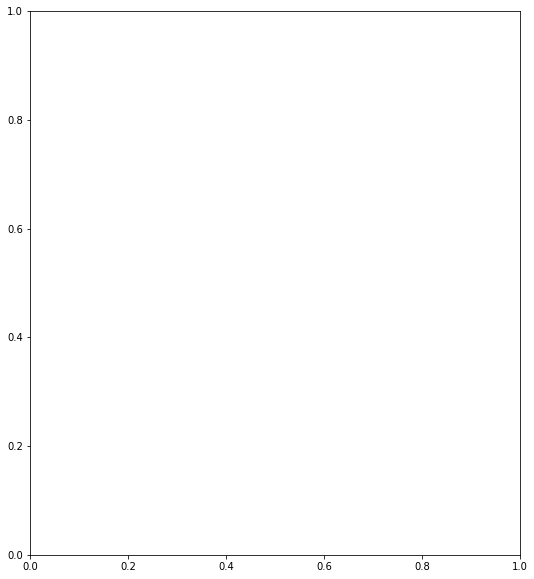

In [12]:
pytplot.tplot('dE_wav_narrow')


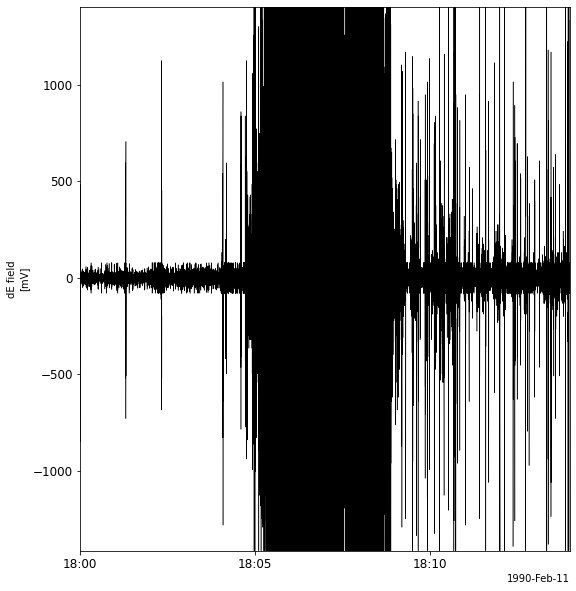

In [7]:
pytplot.tlimit(['1990-02-11 18:00:00', '1990-02-11 18:14:00'])
pytplot.tplot('dE_wav_narrow')

In [4]:
import cdflib
cdf_file = cdflib.CDF('ak_h1_elf_19900211_v03.cdf')
cdf_file.cdf_info()

{'CDF': PosixPath('/home/www/Document/Akebono_analysis/Akebono_analysis/VLF_mca/Akebono_ELF_data/ak_h1_elf_19900211_v03.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['dE_wav_narrow',
  'dBx_wav_narrow',
  'dBy_wav_narrow',
  'dBz_wav_narrow',
  'E_axis',
  'Mode',
  'Epoch',
  'Epoch_wav_narrow',
  'PostGap'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resolution': 